In [1]:
#Employee Retention Analysis
#Predicting if an employee will leave or stay based on different parameters
#importing all the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#loading the data set and checking what the data looks like
filename="C:/Users/aarus/Documents/Employee-Retention-Analysis-master/hr_data.csv"
df=pd.read_csv(filename)
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
#checking if there any null values in the data set that need to be replaced
df.isnull().any()

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [4]:
#loading the 2nd data set and checking what the data looks like
filename2="C:/Users/aarus/Documents/Employee-Retention-Analysis-master/employee_satisfaction_evaluation.xlsx"
df2=pd.read_excel(filename2)
df2.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [5]:
#join operation on 1st data set and 2nd data set based on employee_id and checking the data
main_df=df.set_index('employee_id').join(df2.set_index('EMPLOYEE #'))
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [6]:
#checking if there are any null values in the main data set
main_df[main_df.isnull().any(axis=1)]

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
3794,2,160,3,1,1,1,sales,low,NaN,NaN
1140,5,262,5,0,1,0,sales,low,NaN,0.89
1230,2,140,3,0,1,0,hr,low,NaN,NaN
1340,2,132,3,0,1,0,support,low,NaN,NaN
22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
1581,2,143,3,0,1,0,sales,low,NaN,NaN
17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
1739,4,158,4,1,1,0,technical,low,NaN,NaN
1847,2,129,3,0,1,0,management,low,NaN,NaN


In [7]:
#The null values can be replaced by mean or median values of the respective attributes.
#The reason for using median in place of mean is that median is not affected by outliers as opposed to mean
main_df.fillna(main_df.median(),inplace=True)

No handles with labels found to put in legend.


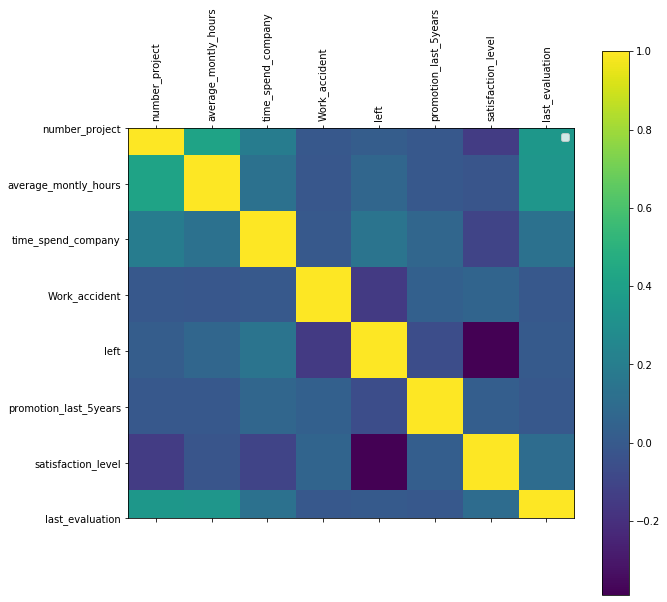

In [8]:
#Correlation Matrix between different attributes to see the relations between them
def correlation(df,size=10):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
correlation(main_df)

In [9]:
#Performing Hot encoding on categorical data
categorical=['department','salary']
main_df_final=pd.get_dummies(main_df,columns=categorical)

In [10]:
#Creating dependent variable for Multi-variate logistic regression
y=main_df_final['left']
y=np.array(y).reshape(-1,1)
y.shape

(14999, 1)

In [11]:
#Creating independent variable for Multi-variate logistic regression
x=main_df_final.drop(['left'],axis=1).values
x.shape

(14999, 20)

In [12]:
#Splitting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
#Normalizing the test data
#Scaling and fitting training data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.649564,0.100951,-1.022909,-0.413654,-0.146636,0.316820,-0.318844,3.347856,-0.231490,-0.229657,-0.223148,-0.21235,-0.243354,-0.253723,-0.616290,-0.419166,-0.477144,-0.303777,1.025372,-0.865087
1,-0.649564,-0.759992,-1.022909,-0.413654,-0.146636,-0.165607,-0.377297,-0.298699,-0.231490,-0.229657,-0.223148,-0.21235,-0.243354,-0.253723,-0.616290,2.385691,-0.477144,-0.303777,1.025372,-0.865087
2,0.161059,1.262222,1.717639,-0.413654,-0.146636,1.040459,0.733309,-0.298699,-0.231490,-0.229657,-0.223148,-0.21235,-0.243354,-0.253723,-0.616290,2.385691,-0.477144,-0.303777,1.025372,-0.865087
3,0.971682,1.102047,-0.337772,-0.413654,-0.146636,-0.246011,-0.961826,-0.298699,4.319844,-0.229657,-0.223148,-0.21235,-0.243354,-0.253723,-0.616290,-0.419166,-0.477144,-0.303777,-0.975256,1.155952
4,-0.649564,-1.160430,-1.022909,-0.413654,-0.146636,-0.326416,-0.435750,-0.298699,-0.231490,-0.229657,-0.223148,-0.21235,-0.243354,-0.253723,1.622613,-0.419166,-0.477144,-0.303777,1.025372,-0.865087


In [14]:
#Creating logistic model
model=LogisticRegression(solver='lbfgs')
model.fit(x_train,y_train)
predictions=model.predict(x_test)

C:\Users\aarus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
#Predicting if an employee stays or leaves on test Data
x_test[2]



array([ 0.97168225,  1.02195899, -0.33777216,  2.41747765, -0.14663641,
        0.5982352 ,  1.61010248, -0.29869863, -0.23148986, -0.22965715,
       -0.22314798, -0.21235012, -0.24335395, -0.25372329,  1.6226127 ,
       -0.4191657 , -0.47714363, -0.30377703,  1.02537177, -0.86508748])

In [16]:
#Predicting if an employee stays or leaves on test Data
y_test[2]

array([0], dtype=int64)

In [17]:
#Predicting if an employee stays or leaves on test Data
predictions[2]

0

In [18]:
100*accuracy_score(predictions,y_test)

79.4

In [19]:
# using Random Forest Classifier 
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
#Making random forest model
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
predictions2=model2.predict(x_test)
score=model2.score(x_test,y_test)

C:\Users\aarus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aarus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
predictions[2]

0

In [22]:
score

0.9851111111111112

In [23]:
#Checking accuracy score with random forest classfier
100*accuracy_score(predictions2,y_test)

98.51111111111112

In [24]:
#Random forest classfier gives a better accuracy score as compared to Logistic Regression